![alt text][logo]

[logo]: https://github.com/legolason/PyQSOFit/blob/master/QSOFit_logo.png?raw=true


# PyQSOFit


PyQSOFit is a flexible tool to decompose the quasar spectrum. It‘s transferred from [Yue Shen](http://quasar.astro.illinois.edu/)'s IDL qsofit code, but not exactly the same. With this program, people can get the information of quasar continuum and emission lines, e.g., continuum slope, line FWHM, line dispersion, EW, peak, etc.

## Detailed Usage

## 1. Fit type 1 QSO

__Step 1__:<br>
Firstly, run the script below to produce the line list file, qsopar.fits, containing lines and their constraints, which will be needed in the following fitting program. From this file, you can change some specific parameters to suit your requirements, e.g., fitting range, line width, tie line center, tie line sigma, etc. If you want to fit extra lines, please append it to corresponding complex. Note that our line wavelength and sigma in the list are in Ln scale, like Lnlambda, Lnsigma. 

In [1]:
%matplotlib inline
import glob, os,sys,timeit
import matplotlib
import numpy as np
sys.path.append('../')
from PyQSOFit import QSOFit
from astropy.io import fits
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

path='../'

newdata = np.rec.array([(6564.61,'Ha',6400.,6800.,'Ha_br',3,5e-3,0.004,0.05,0.015,0,0,0,0.05),\
                        (6564.61,'Ha',6400.,6800.,'Ha_na',1,1e-3,5e-4,0.0017,0.01,1,1,0,0.002),\
                        (6549.85,'Ha',6400.,6800.,'NII6549',1,1e-3,2.3e-4,0.0017,5e-3,1,1,1,0.001),\
                        (6585.28,'Ha',6400.,6800.,'NII6585',1,1e-3,2.3e-4,0.0017,5e-3,1,1,1,0.003),\
                        (6718.29,'Ha',6400.,6800.,'SII6718',1,1e-3,2.3e-4,0.0017,5e-3,1,1,2,0.001),\
                        (6732.67,'Ha',6400.,6800.,'SII6732',1,1e-3,2.3e-4,0.0017,5e-3,1,1,2,0.001),\
                        
                        (4862.68,'Hb',4640.,5100.,'Hb_br',1,5e-3,0.004,0.05,0.01,0,0,0,0.01),\
                        (4862.68,'Hb',4640.,5100.,'Hb_na',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.002),\
                        (4960.30,'Hb',4640.,5100.,'OIII4959c',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.002),\
                        (5008.24,'Hb',4640.,5100.,'OIII5007c',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.004),\
                        #(4960.30,'Hb',4640.,5100.,'OIII4959w',1,3e-3,2.3e-4,0.004,0.01,2,2,0,0.001),\
                        #(5008.24,'Hb',4640.,5100.,'OIII5007w',1,3e-3,2.3e-4,0.004,0.01,2,2,0,0.002),\
                        #(4687.02,'Hb',4640.,5100.,'HeII4687_br',1,5e-3,0.004,0.05,0.005,0,0,0,0.001),\
                        #(4687.02,'Hb',4640.,5100.,'HeII4687_na',1,1e-3,2.3e-4,0.0017,0.005,1,1,0,0.001),\
                        
                        #(3934.78,'CaII',3900.,3960.,'CaII3934',2,1e-3,3.333e-4,0.0017,0.01,99,0,0,-0.001),\
                        
                        #(3728.48,'OII',3650.,3800.,'OII3728',1,1e-3,3.333e-4,0.0017,0.01,1,1,0,0.001),\
                        
                        #(3426.84,'NeV',3380.,3480.,'NeV3426',1,1e-3,3.333e-4,0.0017,0.01,0,0,0,0.001),\
                        #(3426.84,'NeV',3380.,3480.,'NeV3426_br',1,5e-3,0.0025,0.02,0.01,0,0,0,0.001),\
                        
                        (2798.75,'MgII',2700.,2900.,'MgII_br',3,5e-3,0.004,0.05,0.0017,0,0,0,0.05), #3 is number of gaussian to fit with \ 
                        (2798.75,'MgII',2700.,2900.,'MgII_na',3,1e-3,5e-4,0.0017,0.01,1,1,0,0.002),\
                        
                        
                        (1908.73,'CIII',1700.,1970.,'CIII_br',2,5e-3,0.004,0.05,0.015,99,0,0,0.01),\
                        #(1908.73,'CIII',1700.,1970.,'CIII_na',1,1e-3,5e-4,0.0017,0.01,1,1,0,0.002),\
                        #(1892.03,'CIII',1700.,1970.,'SiIII1892',1,2e-3,0.001,0.015,0.003,1,1,0,0.005),\
                        #(1857.40,'CIII',1700.,1970.,'AlIII1857',1,2e-3,0.001,0.015,0.003,1,1,0,0.005),\
                        #(1816.98,'CIII',1700.,1970.,'SiII1816',1,2e-3,0.001,0.015,0.01,1,1,0,0.0002),\
                        #(1786.7,'CIII',1700.,1970.,'FeII1787',1,2e-3,0.001,0.015,0.01,1,1,0,0.0002),\
                        #(1750.26,'CIII',1700.,1970.,'NIII1750',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        #(1718.55,'CIII',1700.,1900.,'NIV1718',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        
                        (1549.06,'CIV',1500.,1700.,'CIV_br',1,5e-3,0.004,0.05,0.015,0,0,0,0.05),\
                        (1549.06,'CIV',1500.,1700.,'CIV_na',1,1e-3,5e-4,0.0017,0.01,1,1,0,0.002),\
                        #(1640.42,'CIV',1500.,1700.,'HeII1640',1,1e-3,5e-4,0.0017,0.008,1,1,0,0.002),\
                        #(1663.48,'CIV',1500.,1700.,'OIII1663',1,1e-3,5e-4,0.0017,0.008,1,1,0,0.002),\
                        #(1640.42,'CIV',1500.,1700.,'HeII1640_br',1,5e-3,0.0025,0.02,0.008,1,1,0,0.002),\
                        #(1663.48,'CIV',1500.,1700.,'OIII1663_br',1,5e-3,0.0025,0.02,0.008,1,1,0,0.002),\
                        
                        #(1402.06,'SiIV',1290.,1450.,'SiIV_OIV1',1,5e-3,0.002,0.05,0.015,1,1,0,0.05),\
                        #(1396.76,'SiIV',1290.,1450.,'SiIV_OIV2',1,5e-3,0.002,0.05,0.015,1,1,0,0.05),\
                        #(1335.30,'SiIV',1290.,1450.,'CII1335',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        #(1304.35,'SiIV',1290.,1450.,'OI1304',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        
                        (1215.67,'Lya',1150.,1290.,'Lya_br',1,5e-3,0.004,0.05,0.02,0,0,0,0.05),\
                        (1215.67,'Lya',1150.,1290.,'Lya_na',1,1e-3,5e-4,0.0017,0.01,0,0,0,0.002)\
                        ],\
                     formats='float32,a20,float32,float32,a20,float32,float32,float32,float32,\
                     float32,float32,float32,float32,float32',\
                     names='lambda,compname,minwav,maxwav,linename,ngauss,inisig,minsig,maxsig,voff,vindex,windex,findex,fvalue')
#------header-----------------
hdr = fits.Header()
hdr['lambda'] = 'Vacuum Wavelength in Ang'
hdr['minwav'] = 'Lower complex fitting wavelength range'
hdr['maxwav'] = 'Upper complex fitting wavelength range'
hdr['ngauss'] = 'Number of Gaussians for the line'
hdr['inisig'] = 'Initial guess of linesigma [in lnlambda]'
hdr['minsig'] = 'Lower range of line sigma [lnlambda]'  
hdr['maxsig'] = 'Upper range of line sigma [lnlambda]'
hdr['voff  '] = 'Limits on velocity offset from the central wavelength [lnlambda]'
hdr['vindex'] = 'Entries w/ same NONZERO vindex constrained to have same velocity'
hdr['windex'] = 'Entries w/ same NONZERO windex constrained to have same width'
hdr['findex'] = 'Entries w/ same NONZERO findex have constrained flux ratios'
hdr['fvalue'] = 'Relative scale factor for entries w/ same findex'
#------save line info-----------
hdu = fits.BinTableHDU(data=newdata,header=hdr,name='data')
hdu.writeto(path+'qsopar.fits',overwrite=True)


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


__Step 2__:<br>
Setup the paths and read in your spectrum. Our code is written under the frame of SDSS spectral data format. Other data is also available as long as they include wavelength, flux, error, and redshift, and make sure the wavelength resolution is the same as SDSS spectrum (For SDSS the pixel scale is 1.e-4 in log space).

In [2]:
data=fits.open('../example/data/J1554+1937_sdssrebin.fits')

In [3]:
data[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   40 / length of dimension 1                          
NAXIS2  =                 6953 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    5 / number of table fields                         
TTYPE1  = 'Rest-frame Wavelength'                                               
TFORM1  = 'D       '                                                            
TTYPE2  = 'Flux    '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'Flux Errors'     

In [4]:

path1='../'                  # the path of the source code file and qsopar.fits
path2='./data/result/' # path of fitting results
path3='./data/QA_other/'   # path of figure
path4='../sfddata/'             # path of dusp reddening map

#Requried
# an important note that all the data input must be finite, especically for the error !!!
data = fits.open(path1+'example/data/J1554+1937_sdssrebin.fits')
mask = data[1].data["Mask"]
z    = data[1].data['Redshift'][0]                # Redshift
lam  = data[1].data['Rest-frame Wavelength']*(1+z)        # OBS wavelength [A]
flux = data[1].data['Flux']             # OBS flux [erg/s/cm^2/A]
err  = data[1].data['Flux Errors']  # 1 sigma error
err[mask!=0] = 0.
flux[mask!=0] = 0.

#Optinal
"""
ra=data[0].header['plug_ra']          # RA 
dec=data[0].header['plug_dec']        # DEC
plateid = data[0].header['plateid']   # SDSS plate ID
mjd = data[0].header['mjd']           # SDSS MJD
fiberid = data[0].header['fiberid']   # SDSS fiber ID
"""


"\nra=data[0].header['plug_ra']          # RA \ndec=data[0].header['plug_dec']        # DEC\nplateid = data[0].header['plateid']   # SDSS plate ID\nmjd = data[0].header['mjd']           # SDSS MJD\nfiberid = data[0].header['fiberid']   # SDSS fiber ID\n"

__Step 3__:<br>
Use QSOFit to input the lam, flux, err, z, and other optinal parameters. Use function Fit to perform the fitting. Default settings cannot meet all needs. Please change settings for your own requirements. It depends on what science you need. The following example set dereddening, host decomposition to True and do not perform error measurement using Monte Carlo method.

In [5]:
np.isnan(err).sum()

0

[1 1]
[2]
[3 3]
Fitting finished in : 3.0s


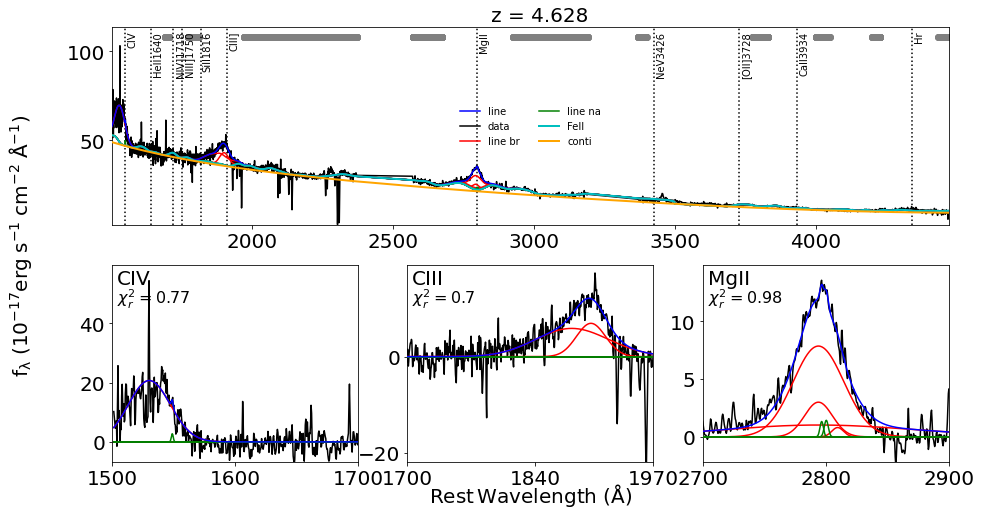

In [6]:
# get data prepared 
q = QSOFit(lam, flux*10**17, err*10**17, z, path = path1, or_mask=mask)

start = timeit.default_timer()
# do the fitting
q.Fit(name = None,nsmooth = 1, and_or_mask = False, deredden = True, reject_badpix = False, wave_range = None,\
      wave_mask =None, decomposition_host = False, Mi = None, npca_gal = 5, npca_qso = 20, \
      Fe_uv_op = True, Fe_flux_range=np.array([2000,4435]), poly = True, BC = False, rej_abs = False, \
      initial_guess = None, MC = False, n_trails = 5, linefit = True, tie_lambda = True, tie_width = True, \
      tie_flux_1 = True, tie_flux_2 = True, save_result = True, plot_fig = True,save_fig = False, \
      plot_line_name = True, plot_legend = True, dustmap_path = path4, save_fig_path = path3, \
      save_fits_path = path2,save_fits_name = None)

end = timeit.default_timer()

print('Fitting finished in : '+str(np.round(end-start))+'s')
    
# grey shade on the top is the continuum windiows used to fit.

By now, you already finish the QSO fitting part. 

### Step 4:
#### Get all models for the whole spectrum

Continue to look at this section and below if you want to do some further calculations based on the fitting results. Here, we show how to extract different models from our fitting results, such as continuum model, emission line models and host galaxy component. Note that the emission regions of host galaxy template should be blocked, e.g., H$\alpha$ [6540, 6590].

There are two ways to calculate the $Fe_{II}$ flux within given ranges:
1. If you want the program calculate the $Fe_{II}$ flux automatically and documented them in result file, you can use the parameter `Fe_flux_range` in `Fit()` to assign ranges.
2. We also provide build-in function `Get_Fe_flux` to calculate the $Fe_{II}$ flux directly after you finished the fitting part.

Fe flux within a specific range: 
Fe_flux_4400_4900: 0.0


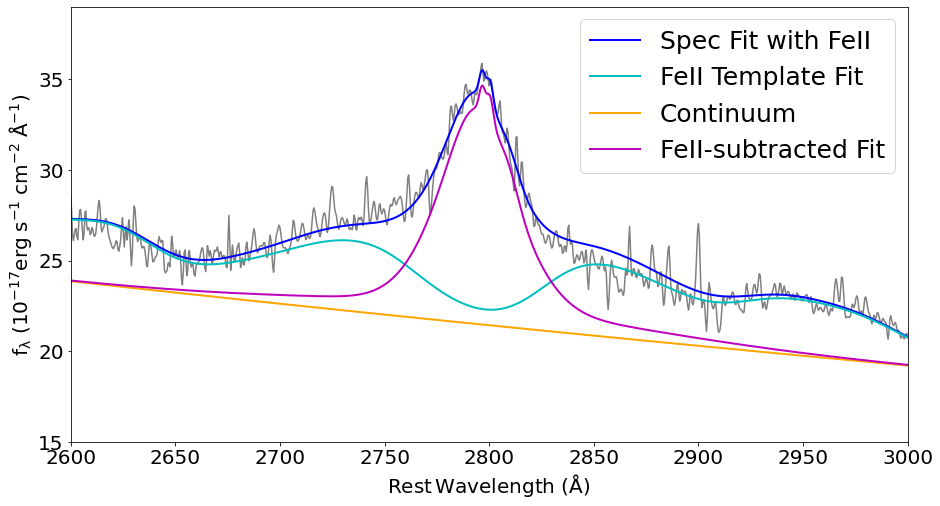

In [9]:
fig=plt.figure(figsize=(15,8))
#plot the quasar rest frame spectrum after removed the host galaxy component
plt.plot(q.wave,q.flux,'grey')              
plt.plot(q.wave,q.err,'r')


#To plot the whole model, we use Manygauss to reappear the line fitting results saved in gauss_result  
plt.plot(q.wave,q.Manygauss(np.log(q.wave),q.gauss_result)+q.f_conti_model,'b',label='Spec Fit with FeII',lw=2)
plt.plot(q.wave,q.f_conti_model,'c',lw=2, label="FeII Template Fit")
plt.plot(q.wave,q.PL_poly_BC,"orange",label='Continuum',lw=2)
plt.plot(q.wave,q.Manygauss(np.log(q.wave),q.gauss_result)+q.PL_poly_BC,'m',label='FeII-subtracted Fit',lw=2)
#plt.plot(q.wave,q.host,'m',lw=2)

#plt.xlim(2550,3500)
plt.xlim(2600,3000)
plt.ylim(15,39)
plt.xlabel(r'$\rm Rest \, Wavelength$ ($\rm \AA$)',fontsize = 20)
plt.ylabel(r'$\rm f_{\lambda}$ ($\rm 10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$)',fontsize = 20)
plt.legend(loc="upper right", prop={"size":25})

#print('optical Fe flux (10^(-17) erg/s/cm^2): '+q.conti_result[q.conti_result_name=='Fe_flux_4435_4685'][0])

Fe_flux_result,Fe_flux_type,Fe_flux_name = q.Get_Fe_flux(np.array([4400,4900]))
print('Fe flux within a specific range: \n'+Fe_flux_name[0]+': '+str(Fe_flux_result[0]))

### Setp 5:
#### Get models for each line complex
All the line parameters are in the gauss_result, it was saved following the order of qsopar.fits. For each Gaussian, three parameter (scale, Ln(lambda), Ln(sigma)) are saved.
If you want to filter the line below or above 1200 km/s (lnsigma = 0.0017), the function CalFWHM can be used as following.
The line_prop is desiged to calculate the broad line properties, not for the narrow line.

Broad MgII:
FWHM (km/s) 4306.0
Sigma (km/s) 1804.3
EW (A) 18.5
Peak (A) 1530.2
area (10^(-17) erg/s/cm^2) 884.8


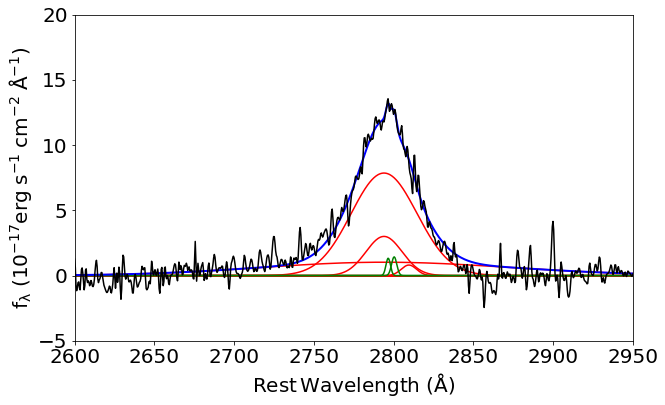

In [8]:
fig=plt.figure(figsize=(10,6))
for p in range(int(len(q.gauss_result)/3)):
    if q.CalFWHM(q.gauss_result[3*p+2] ) < 1200.:  # < 1200 km/s narrow
        color = 'g'
    else:
        color = 'r'
    plt.plot(q.wave,q.Onegauss(np.log(q.wave),q.gauss_result[p*3:(p+1)*3]),color=color)
plt.plot(q.wave,q.Manygauss(np.log(q.wave),q.gauss_result),'b',lw=2)
plt.plot(q.wave,q.line_flux,'k')
plt.xlim(2600,2950)
plt.ylim(-5,20)
plt.xlabel(r'$\rm Rest \, Wavelength$ ($\rm \AA$)',fontsize = 20)
plt.ylabel(r'$\rm f_{\lambda}$ ($\rm 10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$)',fontsize = 20)




# the line_prop function is used to calculate the broad line properties (Lnsigma > 0.0017 (1200 km/s) )
#print q.line_result_name
#if you want to calculate the paramters of broad Hb
#then find all the broad Hb component, i.e., Hb_br_[1,2,3]_[scale,centerwave,sigma]
#for here q.line_result_name[12:15],q.line_result[12:15] is the broad Hb

fwhm,sigma,ew,peak,area = q.line_prop(q.linelist[10][0],q.line_result[18:21],'broad') 
print("Broad MgII:")
print("FWHM (km/s)", np.round(fwhm,1))
print("Sigma (km/s)", np.round(sigma,1))
print("EW (A)",np.round(ew,1))
print("Peak (A)",np.round(peak,1))
print("area (10^(-17) erg/s/cm^2)",np.round(area,1))

In [10]:
q.gauss_result

array([5.79714987e-01, 7.33324027e+00, 1.11543328e-02, 3.47327527e-03,
       7.34539953e+00, 5.00000024e-04, 1.45715353e-01, 7.55034853e+00,
       8.39731709e-03, 3.15144069e-01, 7.53919363e+00, 2.14287628e-02,
       3.06060953e-02, 7.93522835e+00, 4.06875478e-03, 7.16298757e-02,
       7.93522835e+00, 2.78969238e-02, 1.45420907e-01, 7.93522835e+00,
       7.38275318e-03, 3.43902759e-03, 7.94080295e+00, 1.70000002e-03,
       1.66865739e-03, 7.93617450e+00, 5.00000024e-04, 2.09322666e-03,
       7.93751262e+00, 5.82665544e-04])

In [11]:
q.linelist[10], q.linelist

((2798.75, 'MgII', 2700.0, 2900.0, 'MgII_br', 3.0, 0.005, 0.004, 0.05, 0.0017, 0.0, 0.0, 0.0, 0.05),
 FITS_rec([(6564.61, 'Ha', 6400., 6800., 'Ha_br', 3., 0.005, 0.004  , 0.05  , 0.015 ,  0., 0., 0., 0.05 ),
           (6564.61, 'Ha', 6400., 6800., 'Ha_na', 1., 0.001, 0.0005 , 0.0017, 0.01  ,  1., 1., 0., 0.002),
           (6549.85, 'Ha', 6400., 6800., 'NII6549', 1., 0.001, 0.00023, 0.0017, 0.005 ,  1., 1., 1., 0.001),
           (6585.28, 'Ha', 6400., 6800., 'NII6585', 1., 0.001, 0.00023, 0.0017, 0.005 ,  1., 1., 1., 0.003),
           (6718.29, 'Ha', 6400., 6800., 'SII6718', 1., 0.001, 0.00023, 0.0017, 0.005 ,  1., 1., 2., 0.001),
           (6732.67, 'Ha', 6400., 6800., 'SII6732', 1., 0.001, 0.00023, 0.0017, 0.005 ,  1., 1., 2., 0.001),
           (4862.68, 'Hb', 4640., 5100., 'Hb_br', 1., 0.005, 0.004  , 0.05  , 0.01  ,  0., 0., 0., 0.01 ),
           (4862.68, 'Hb', 4640., 5100., 'Hb_na', 1., 0.001, 0.00023, 0.0017, 0.01  ,  1., 1., 0., 0.002),
           (4960.3 , 'Hb', 4640., 5

In [12]:
q.line_result[18:21]

array(['0.5797149872900278', '7.333240267049769', '0.011154332810893588'],
      dtype='<U32')

In [13]:
q.line_result

array(['CIV', '1', '308.2539613095435', '0.768713120472677', '26', '401',
       'CIII', '1', '401.75720248875183', '0.702372731623692', '23',
       '572', 'MgII', '1', '424.46484590054985', '0.9802883277148957',
       '60', '433', '0.5797149872900278', '7.333240267049769',
       '0.011154332810893588', '0.0034732752704260926',
       '7.345399528476949', '0.0005000000237487257', '0.1457153529000495',
       '7.550348532003489', '0.00839731708761597', '0.3151440693853778',
       '7.539193630218506', '0.021428762757511377',
       '0.030606095313361704', '7.93522834777832',
       '0.0040687547779846706', '0.07162987574309716', '7.93522834777832',
       '0.027896923844548165', '0.1454209069444746', '7.93522834777832',
       '0.007382753178416129', '0.003439027590563445',
       '7.940802954575294', '0.0017000000225380063',
       '0.0016686573867502558', '7.9361745003115125',
       '0.0005000000237487257', '0.002093226656045146',
       '7.9375126150996165', '0.000582665543913391

### Step 6:
### Calculate BH mass

New relation in Shen et al. (2011) says:
$$ \log{(\frac{M_\mathrm{BH,vir}}{M_\odot})} = a + b\log{(\frac{\lambda L_\lambda}{10^{44}\,\mathrm{erg}\;\mathrm{s}^{-1}})} + 2\log{(\frac{\mathrm{FWHM}}{\mathrm{km}\;\mathrm{s}^{-1}}{})} $$

Where $a = 0.740$ and $b = 0.62$ for MgII.

---

Compute luminosity at 2799.117Å

In [30]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

def luminosity(S, z, alpha=-0.5):
    #calculate luminosity based on flux S (erg/s/cm2)
    DL = 3.086e24*cosmo.luminosity_distance(z).value #convert Mpc to cm
    L = ((4*np.pi*DL**2*(S)) / ((1+z)**(1+alpha)))
    return np.log10(L) #returns erg/s

First get continuum flux in ergs/s/cm2 = 10^29 µJy

In [16]:
q.PL_poly_BC.shape, q.wave.shape

((6079,), (6079,))

In [31]:
lambd = q.wave[np.argmin(abs(q.wave-2799.117))]
f_lambda = q.PL_poly_BC[np.argmin(abs(q.wave-2799.117))]

Fe flux within a specific range: 
Fe_flux_4400_4900: 0.0


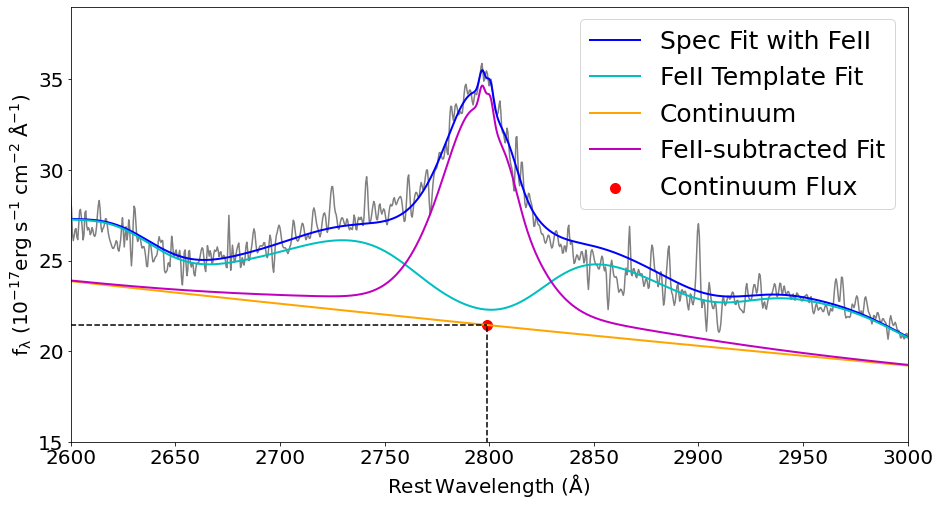

In [32]:
fig=plt.figure(figsize=(15,8))
#plot the quasar rest frame spectrum after removed the host galaxy component
plt.plot(q.wave,q.flux,'grey')              
plt.plot(q.wave,q.err,'r')


#To plot the whole model, we use Manygauss to reappear the line fitting results saved in gauss_result  
plt.plot(q.wave,q.Manygauss(np.log(q.wave),q.gauss_result)+q.f_conti_model,'b',label='Spec Fit with FeII',lw=2)
plt.plot(q.wave,q.f_conti_model,'c',lw=2, label="FeII Template Fit")
plt.plot(q.wave,q.PL_poly_BC,"orange",label='Continuum',lw=2)
plt.plot(q.wave,q.Manygauss(np.log(q.wave),q.gauss_result)+q.PL_poly_BC,'m',label='FeII-subtracted Fit',lw=2)
#plt.plot(q.wave,q.host,'m',lw=2)
plt.scatter(lambd, f_lambda, color="red", s=100, label="Continuum Flux")
plt.plot([lambd,lambd],[0,f_lambda],"--k")
plt.plot([2500,lambd],[f_lambda,f_lambda],"--k")

#plt.xlim(2550,3500)
plt.xlim(2600,3000)
plt.ylim(15,39)
plt.xlabel(r'$\rm Rest \, Wavelength$ ($\rm \AA$)',fontsize = 20)
plt.ylabel(r'$\rm f_{\lambda}$ ($\rm 10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$)',fontsize = 20)
plt.legend(loc="upper right", prop={"size":25})

#print('optical Fe flux (10^(-17) erg/s/cm^2): '+q.conti_result[q.conti_result_name=='Fe_flux_4435_4685'][0])

Fe_flux_result,Fe_flux_type,Fe_flux_name = q.Get_Fe_flux(np.array([4400,4900]))
print('Fe flux within a specific range: \n'+Fe_flux_name[0]+': '+str(Fe_flux_result[0]))

In [33]:
f_lambda *= 10**(-17) * 2799.117 #in erg/s/cm2

In [34]:
f_lambda

6.002098190382879e-13

In [36]:
L = luminosity(f_lambda, z)
L

46.73991018007813

In [38]:
logM = 0.740 + 0.62*np.log10((10**(L))/(10**(44))) + 2*np.log10(fwhm)

In [39]:
logM

9.706890442123125